In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [5]:
#loading the dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Grayscaled image:
Training data=60000 images
Testing data=10000 images


In [6]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


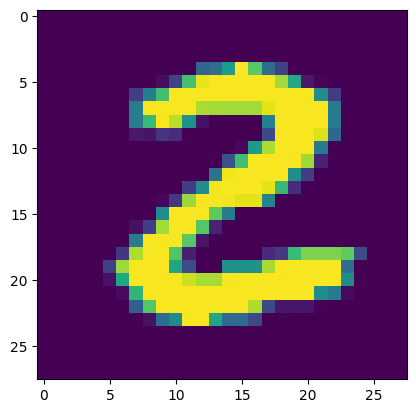

2


In [15]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [18]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images in this dataset have same dimensions and if not then we would have had to resize it

In [19]:
#scaling the images(normalization)
X_train=X_train/255
X_test=X_test/255


In [20]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [22]:
#setting the layers of the neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8419 - loss: 0.5293
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9552 - loss: 0.1491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1069
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9748 - loss: 0.0843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9826 - loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0410
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0350
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0331


**Accuracy on test data**


In [27]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9622 - loss: 0.1536
0.9666000008583069


In [29]:
print(X_test.shape)

(10000, 28, 28)


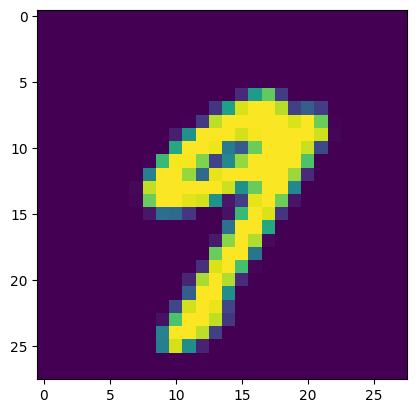

9


In [31]:
plt.imshow(X_test[20])
plt.show()
print(Y_test[20])

In [32]:
Y_pred=model.predict(X_test)
print(Y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.76795479e-03 6.66868035e-03 9.67581153e-01 ... 9.99998748e-01
  1.73412412e-02 2.27067605e-01]
 [6.77275881e-02 2.70650685e-02 1.00000000e+00 ... 5.17941734e-09
  6.36834025e-01 1.32073441e-09]
 [1.72654632e-04 9.99501646e-01 1.26419201e-01 ... 9.25005436e-01
  9.48623180e-01 9.01232881e-04]
 ...
 [1.15101775e-10 1.26932048e-06 1.54991753e-08 ... 8.48504603e-01
  4.67019062e-03 6.79387510e-01]
 [4.53608154e-05 1.19911230e-04 2.83651287e-03 ... 9.33755582e-05
  9.98843670e-01 6.56867633e-03]
 [2.69097887e-04 7.02851537e-08 1.16209248e-02 ... 4.80251181e-08
  9.84504120e-04 5.00052702e-04]]


In [33]:
label_for_first_image=np.argmax(Y_pred[0])

In [34]:
print(label_for_first_image)

7


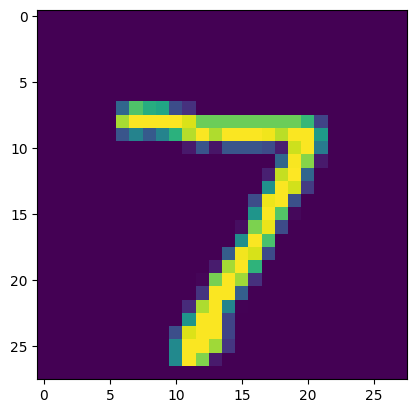

In [35]:
plt.imshow(X_test[0])
plt.show()

In [36]:
#converting the prediction probability for class label
Y_pred_labels=[np.argmax(i) for i in Y_pred]

In [38]:
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [40]:
conf_matr=confusion_matrix(Y_test,Y_pred_labels)
print(conf_matr)

tf.Tensor(
[[ 966    0    0    3    0    1    4    0    2    4]
 [   0 1095    2    7    0    0    5    1   25    0]
 [   5    2  982    8    3    0    2   11   17    2]
 [   1    0    2  993    0    1    0    3    6    4]
 [   1    0    4    0  952    0   11    3    3    8]
 [   5    1    0   30    2  837    4    0   10    3]
 [   5    2    2    1    9    2  931    0    6    0]
 [   1    1    7    9    2    0    0  984    6   18]
 [   2    0    3    8    4    0    2    3  948    4]
 [   1    2    0    5   11    4    1    5    3  977]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True')

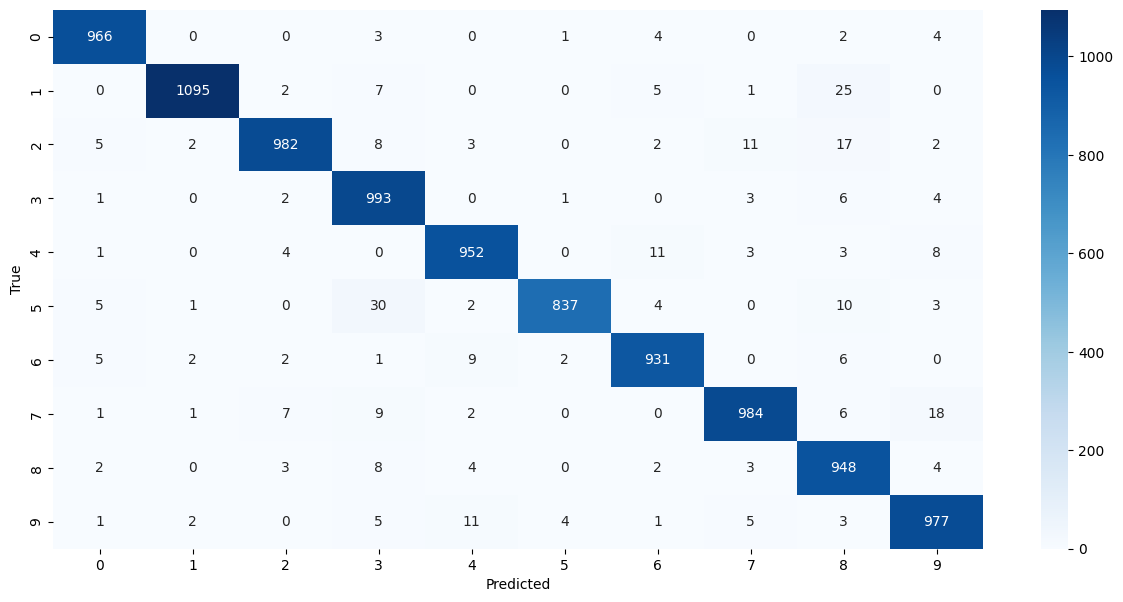

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matr,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

Building the predictive system

In [43]:
input_image=cv2.imread('/content/MNIST_digit.png')

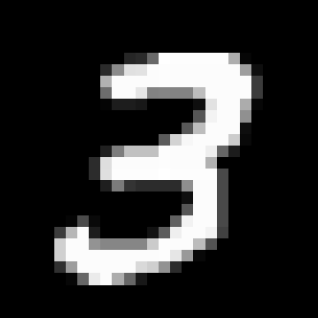

In [44]:
cv2_imshow(input_image)

In [45]:
print(input_image.shape)

(318, 318, 3)


In [47]:
gray_scale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [48]:
print(gray_scale_image.shape)

(318, 318)


In [49]:
input_image_resized=cv2.resize(gray_scale_image,(28,28))

In [50]:
print(input_image_resized.shape)

(28, 28)


In [51]:
input_image_resized=input_image_resized/255

In [52]:
image_reshaped=np.reshape(input_image_resized,(1,28,28))

In [53]:
prediction=model.predict(image_reshaped)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[2.0221615e-10 5.2095344e-03 3.2229726e-03 1.0000000e+00 3.0434269e-06
  1.5648620e-02 8.0130155e-28 4.2534307e-01 6.0315216e-01 9.9989522e-01]]


In [54]:
pred_label=np.argmax(prediction)
print(pred_label)

3


Predictive System

 the path of your image:/content/MNIST_digit.png


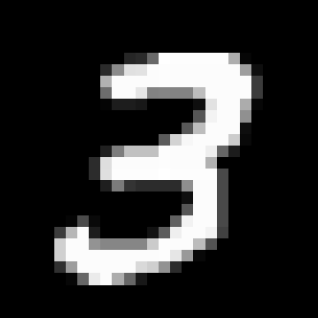

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The handwritten digit is recognised as : 3


In [55]:
input_image_path=input(' the path of your image:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
gray_scale_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resized=cv2.resize(gray_scale_image,(28,28))
input_image_resized=input_image_resized/255
image_reshaped=np.reshape(input_image_resized,(1,28,28))
prediction=model.predict(image_reshaped)
pred_label=np.argmax(prediction)
print('The handwritten digit is recognised as :',pred_label)
